<a href="https://colab.research.google.com/github/utensil/atom-playground/blob/main/archived/LK_99_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculations for LK-99 with ASE and GPAW

## Install Conda and set things up

In [6]:
!pip install condacolab

In [7]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


In [1]:
!conda install cudatoolkit

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.2



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       hbcca054_0         146 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    cudatoolkit-11.8.0         |      h4ba93d1_12       682.8 MB  conda-forge
    openssl-3.1.2              |       hd590300_0         2.5 MB  conda-forge
    ------------------------------

## Install ASE deps and set things up



In [2]:
!pip install ase nglview

  Using cached ase-3.22.1-py3-none-any.whl (2.2 MB)
  Using cached nglview-3.0.6-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.7/798.7 kB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.7 MB/s eta 0:00:00
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from google.colab import output
output.enable_custom_widget_manager()

## Install GPAW and set things up

In [6]:
!apt install libxc-dev libopenmpi-dev liblapack-dev python3-dev libopenblas-dev libxc-dev libscalapack-mpi-dev libfftw3-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libopenblas-dev is already the newest version (0.3.20+ds-1).
libopenmpi-dev is already the newest version (4.1.2-2ubuntu1).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libfftw3-bin libfftw3-double3 libfftw3-long3 libfftw3-quad3 libfftw3-single3
  libscalapack-openmpi-dev libscalapack-openmpi2.1 libxc9
Suggested packages:
  libfftw3-doc scalapack-doc
The following NEW packages will be installed:
  libfftw3-bin libfftw3-dev libfftw3-double3 libfftw3-long3 libfftw3-quad3
  libfftw3-single3 libscalapack-mpi-dev libscalapack-openmpi-dev
  libscalapack-openmpi2.1 libxc-dev libxc9
0 upgraded, 11 newly installed, 0 to remove and 15 not upgraded.
Need to get 18.1 MB of archives.
After this operation, 71.7 MB of additional disk sp

In [8]:
!mkdir -p ~/.gpaw

In [27]:
%%writefile ~/.gpaw/siteconfig.py

import os

# MPI:
mpi = True
compiler = 'mpicc'

fftw = True
scalapack = True
libraries = ['xc', 'blas', 'fftw3', 'scalapack-openmpi', 'cublas', 'cufft', 'cuda', 'cudart']

cuda='/usr/local/cuda-11.8'

library_dirs += [os.path.join(cuda, 'lib64')]
include_dirs += [os.path.join(cuda, 'include')]
# extra_link_args =[
#     '-Wl,-rpath=' + os.path.join(cuda, 'lib64')]
# extra_compile_args =['-xHOST', '-O3', '-ipo', '-std=c99', '-fPIC', '-Wall']
# extra_objects += ['./c/cukernels.o']

gpu = True
gpu_target = 'cuda'
gpu_compiler = 'nvcc'

Overwriting /root/.gpaw/siteconfig.py


In [16]:
!pip install --verbose cupy-cuda11x

Using pip 23.0.1 from /usr/local/lib/python3.10/site-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 MB 8.9 MB/s eta 0:00:00
  Using cached fastrlock-0.8.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_24_x86_64.whl (47 kB)


In [25]:
!pip uninstall -y gpaw

Found existing installation: gpaw 23.6.1
Uninstalling gpaw-23.6.1:
  Successfully uninstalled gpaw-23.6.1


In [28]:
!pip install --verbose git+https://gitlab.com/gpaw/gpaw.git

Using pip 23.0.1 from /usr/local/lib/python3.10/site-packages/pip (python 3.10)
  Cloning https://gitlab.com/gpaw/gpaw.git to /tmp/pip-req-build-xeihzuwk
  Running command git version
  git version 2.34.1
  Running command git clone --filter=blob:none https://gitlab.com/gpaw/gpaw.git /tmp/pip-req-build-xeihzuwk
  Cloning into '/tmp/pip-req-build-xeihzuwk'...
  Updating files:   0% (2/2281)
  Updating files:   1% (23/2281)
  Updating files:   2% (46/2281)
  Updating files:   3% (69/2281)
  Updating files:   4% (92/2281)
  Updating files:   5% (115/2281)
  Updating files:   6% (137/2281)
  Updating files:   7% (160/2281)
  Updating files:   8% (183/2281)
  Updating files:   9% (206/2281)
  Updating files:  10% (229/2281)
  Updating files:  11% (251/2281)
  Updating files:  12% (274/2281)
  Updating files:  13% (297/2281)
  Updating files:  14% (320/2281)
  Updating files:  15% (343/2281)
  Updating files:  16% (365/2281)
  Updating files:  17% (388/2281)
  Updating files:  18% (411/2281)

In [29]:
!mkdir -p /content/gpaw-data/
!yes|gpaw install-data /content/gpaw-data/

Available setups and pseudopotentials
  [*] https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.20000.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.11271.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.9.9672.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.8.7929.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.6.6300.tar.gz
      https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-0.5.3574.tar.gz

Selected gpaw-setups-0.9.20000.tar.gz.  Downloading...
Extracting tarball into /content/gpaw-data/
Setups installed into /content/gpaw-data/gpaw-setups-0.9.20000.
Register this setup path in /root/.gpaw/rc.py? [y/n] It looks like the path is already registered in /root/.gpaw/rc.py.
File will not be modified at this time.
Installation complete.


In [30]:
!gpaw info

 -------------------------------------------------------------------------------------------------
| python-3.10.10    /usr/local/bin/python3.10                                                     |
| gpaw-23.6.2b1     /usr/local/lib/python3.10/site-packages/gpaw/                                 |
| ase-3.22.1        /usr/local/lib/python3.10/site-packages/ase/                                  |
| numpy-1.25.2      /usr/local/lib/python3.10/site-packages/numpy/                                |
| scipy-1.11.1      /usr/local/lib/python3.10/site-packages/scipy/                                |
| libxc-5.1.7       yes                                                                           |
| _gpaw-af1a4087aa  /usr/local/lib/python3.10/site-packages/_gpaw.cpython-310-x86_64-linux-gnu.so |
| MPI enabled       yes                                                                           |
| OpenMP enabled    no                                                                            |
|

In [31]:
%env OMPI_ALLOW_RUN_AS_ROOT=1
%env OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1

env: OMPI_ALLOW_RUN_AS_ROOT=1
env: OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1


In [32]:
!nproc

2


In [33]:
!gpaw test

 -------------------------------------------------------------------------------------------------
| python-3.10.10    /usr/local/bin/python3.10                                                     |
| gpaw-23.6.2b1     /usr/local/lib/python3.10/site-packages/gpaw/                                 |
| ase-3.22.1        /usr/local/lib/python3.10/site-packages/ase/                                  |
| numpy-1.25.2      /usr/local/lib/python3.10/site-packages/numpy/                                |
| scipy-1.11.1      /usr/local/lib/python3.10/site-packages/scipy/                                |
| libxc-5.1.7       yes                                                                           |
| _gpaw-af1a4087aa  /usr/local/lib/python3.10/site-packages/_gpaw.cpython-310-x86_64-linux-gnu.so |
| MPI enabled       yes                                                                           |
| OpenMP enabled    no                                                                            |
|

## ASE common imports

In [1]:
from ase.io import read, write
from ase.visualize import view
from ase.calculators.test import FreeElectrons
from ase.dft.dos import DOS

## GPAW common imports

In [2]:
from gpaw import GPAW, PW

## Load molecules

In [4]:
!git clone https://github.com/Frost-group/LeadCopperApatite.git

fatal: destination path 'LeadCopperApatite' already exists and is not an empty directory.
/content/LeadCopperApatite/0003-M3GNET-MD-ZORAC


In [6]:
%cd /content/LeadCopperApatite/0003-M3GNET-MD-ZORAC

/content/LeadCopperApatite/0003-M3GNET-MD-ZORAC


In [7]:
P6Pb9Cu1O26 = read('P6Pb9Cu1O26.vasp', format='vasp')

In [41]:
calc = P6Pb9Cu1O26.calc = GPAW(xc='PBE', mode=PW(300), txt='P6Pb9Cu1O26.txt')
calc.attach(calc.write, 5, 'P6Pb9Cu1O26.gpw')
P6Pb9Cu1O26.get_potential_energy()

-88.02617761482881

In [9]:
%%html
<audio src="https://oobabooga.github.io/silence.m4a" controls>

In [ ]:
calc = P6Pb9Cu1O26.calc = GPAW('P6Pb9Cu1O26.gpw').fixed_density(
    symmetry='off',
    kpts={'path': 'GMKGALHA', 'npoints': 200},
    convergence={'bands': 8})
calc.attach(calc.write, 5, 'P6Pb9Cu1O26-path.gpw')
bs = calc.band_structure()
bs.plot(emin=-1, emax=8)


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  23.6.2b1
 |___|_|             

User:   ???@3bbe912b2c9c
Date:   Thu Aug  3 14:16:22 2023
Arch:   x86_64
Pid:    29841
CWD:    /content/LeadCopperApatite/0003-M3GNET-MD-ZORAC
Python: 3.10.12
gpaw:   /usr/local/lib/python3.10/site-packages/gpaw
_gpaw:  /usr/local/lib/python3.10/site-packages/
        _gpaw.cpython-310-x86_64-linux-gnu.so (af1a4087aa)
ase:    /usr/local/lib/python3.10/site-packages/ase (version 3.22.1)
numpy:  /usr/local/lib/python3.10/dist-packages/numpy (version 1.22.4)
scipy:  /usr/local/lib/python3.10/site-packages/scipy (version 1.11.1)
libxc:  5.1.7
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {bands: 8}
  gpts: [40 40 30]
  kpts: {npoints: 200,
         path: GMKGALHA}
  mode: {ecut: 300.0,
         name: pw}
  symmetry: off
  xc: PBE

Initialize ...

species:
  P:
    name: Phosphorus
    id: 03b4a34d18bb161274a4ee27145ba

In [ ]:
P6Pb9Cu1O26.calc.get_fermi_level()

4.433421858662549

/usr/local/lib/python3.10/dist-packages/ase/spectrum/band_structure.py:280: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.axis(xmin=0, xmax=self.xcoords[-1], ymin=emin, ymax=emax)


<Axes: ylabel='energies [eV]'>

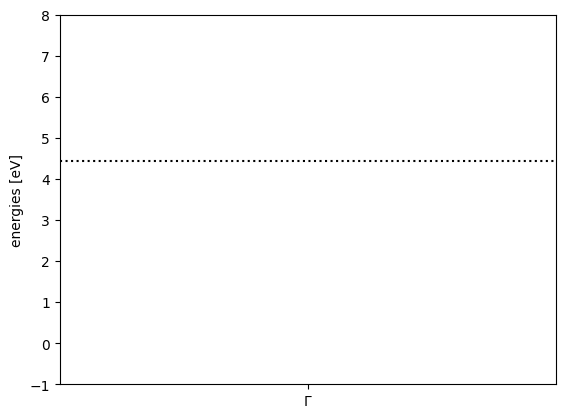

In [ ]:
bs = P6Pb9Cu1O26.calc.band_structure()
bs.plot(emin=-1, emax=8)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'DOS')

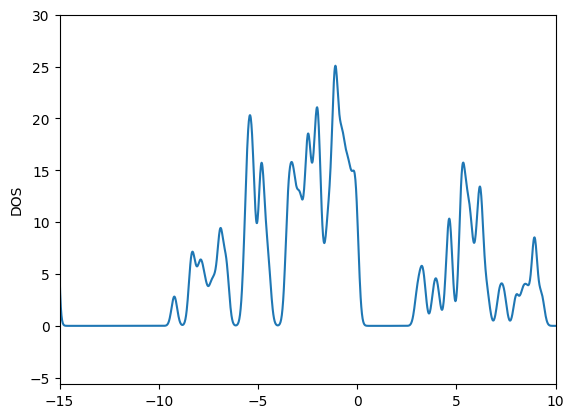

In [ ]:
e, dos = P6Pb9Cu1O26.calc.get_dos(spin=0, npts=2001, width=0.2)
e_f = P6Pb9Cu1O26.calc.get_fermi_level()
plt.plot(e - e_f, dos)
plt.axis([-15, 10, None, 30])

plt.ylabel('DOS')

HEX(a=9.89701, c=7.32663)
  Variant name: HEX
  Special point names: GMKALH
  Default path: GMKGALHA,LM,KH

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    M   0.5000  0.0000  0.0000
    K   0.3333  0.3333  0.0000
    A   0.0000  0.0000  0.5000
    L   0.5000  0.0000  0.5000
    H   0.3333  0.3333  0.5000



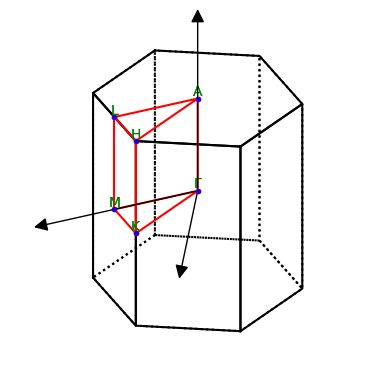

<Axes3D: >

In [ ]:
lat = P6Pb9Cu1O26.cell.get_bravais_lattice()
print(lat.description())
lat.plot_bz(show=True)

In [ ]:
bp = lat.bandpath(path='GMKGALHA', npoints=8)
bp.kpts

In [ ]:
%time
from gpaw import FermiDirac

calc = P6Pb9Cu1O26.calc = GPAW(mode=PW(200),
            xc='PBE',
            kpts=(2, 2, 2),
            random=True,
            occupations=FermiDirac(0.01),
            txt='P6Pb9Cu1O26-gs.txt')
calc.attach(calc.write, 5, 'P6Pb9Cu1O26-gs.gpw')
P6Pb9Cu1O26.get_potential_energy()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


In [ ]:
calc = P6Pb9Cu1O26.calc = GPAW('P6Pb9Cu1O26-gs.gpw').fixed_density(
    nbands=16,
    symmetry='off',
    kpts={'path': 'GMKGALHA', 'npoints': 200},
    convergence={'bands': 8})
calc.attach(calc.write, 5, 'P6Pb9Cu1O26-path.gpw')
bs = calc.band_structure()
bs.plot(emin=-1, emax=8)

In [ ]:
calc = P6Pb9Cu1O26.calc = GPAW(mode=PW(200), xc='PBE', random=True,
            occupations=FermiDirac(0.01),
            kpts={'path': 'GMKGALHA', 'npoints': 200}, txt='P6Pb9Cu1O26.txt')
calc.attach(calc.write, 5, 'P6Pb9Cu1O26-path.gpw')
P6Pb9Cu1O26.get_potential_energy()